In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
data3 = pd.read_csv("/content/banking.csv")
data3.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [12]:
data3.shape

(41188, 21)

In [13]:
data3.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f62ee68e890>,
      dtype=object)

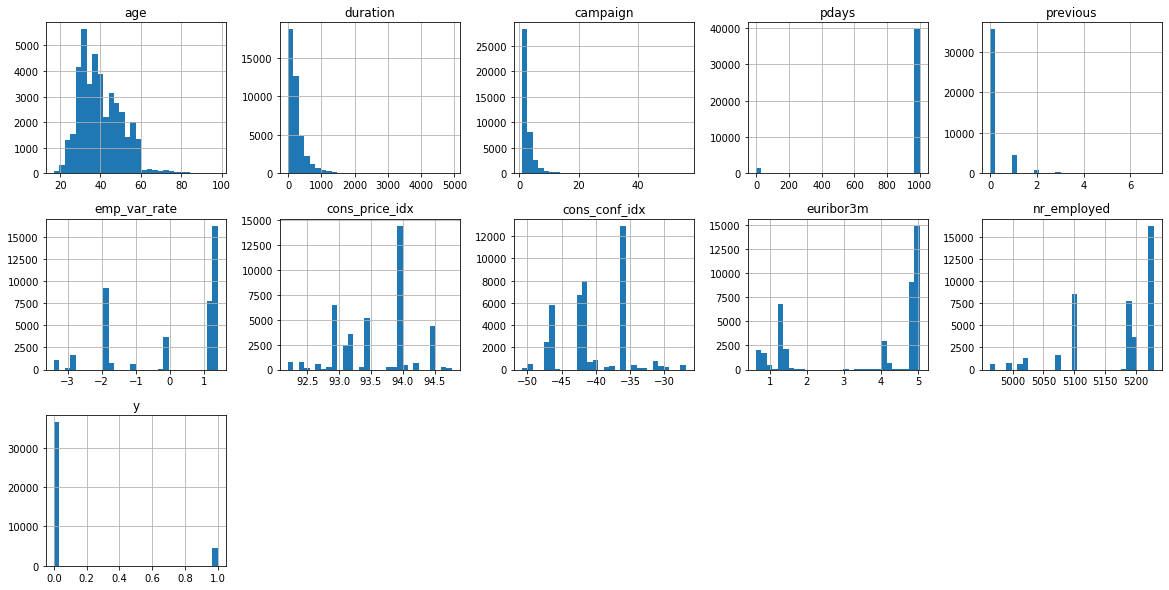

In [30]:
data3.hist(figsize=(20, 10), grid = True, layout=(3, 5), bins = 30)

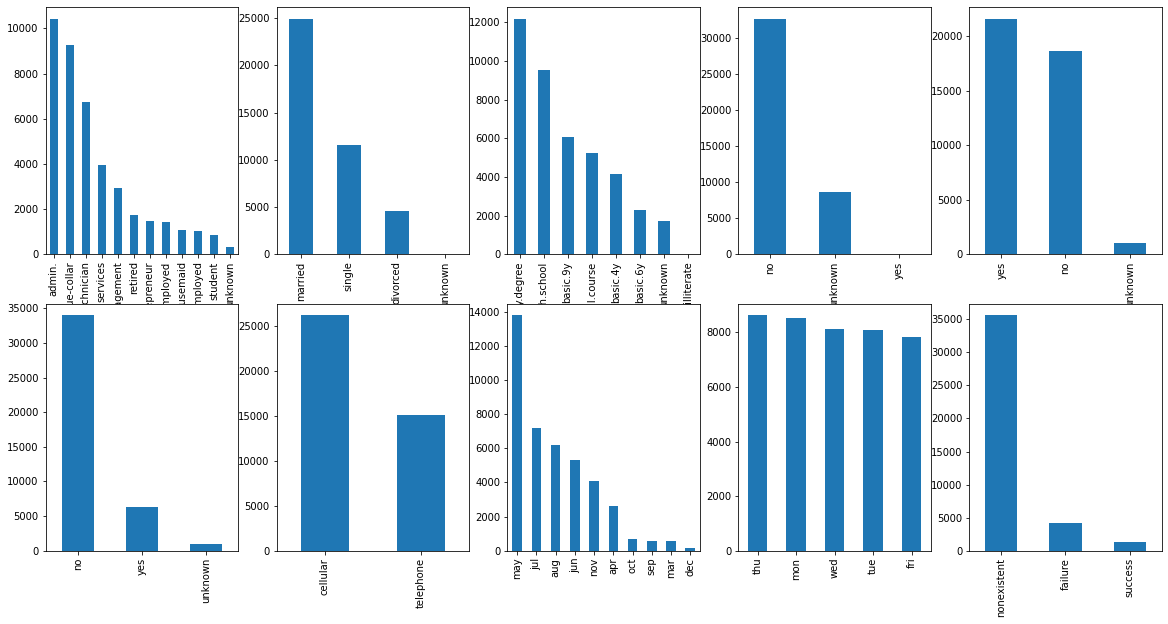

In [38]:
cat_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10))

for col in range(len(cat_cols)):
    # print("The histogram for column", col)
    data3[cat_cols[col]] = data3[cat_cols[col]].astype(str)
    plot = data3[cat_cols[col]].value_counts().plot(kind = "bar", ax = axes[col//5, col%5])
    fig.add_subplot(plot)
    # i += 1
    # plt.show(plot)
    
plt.show()

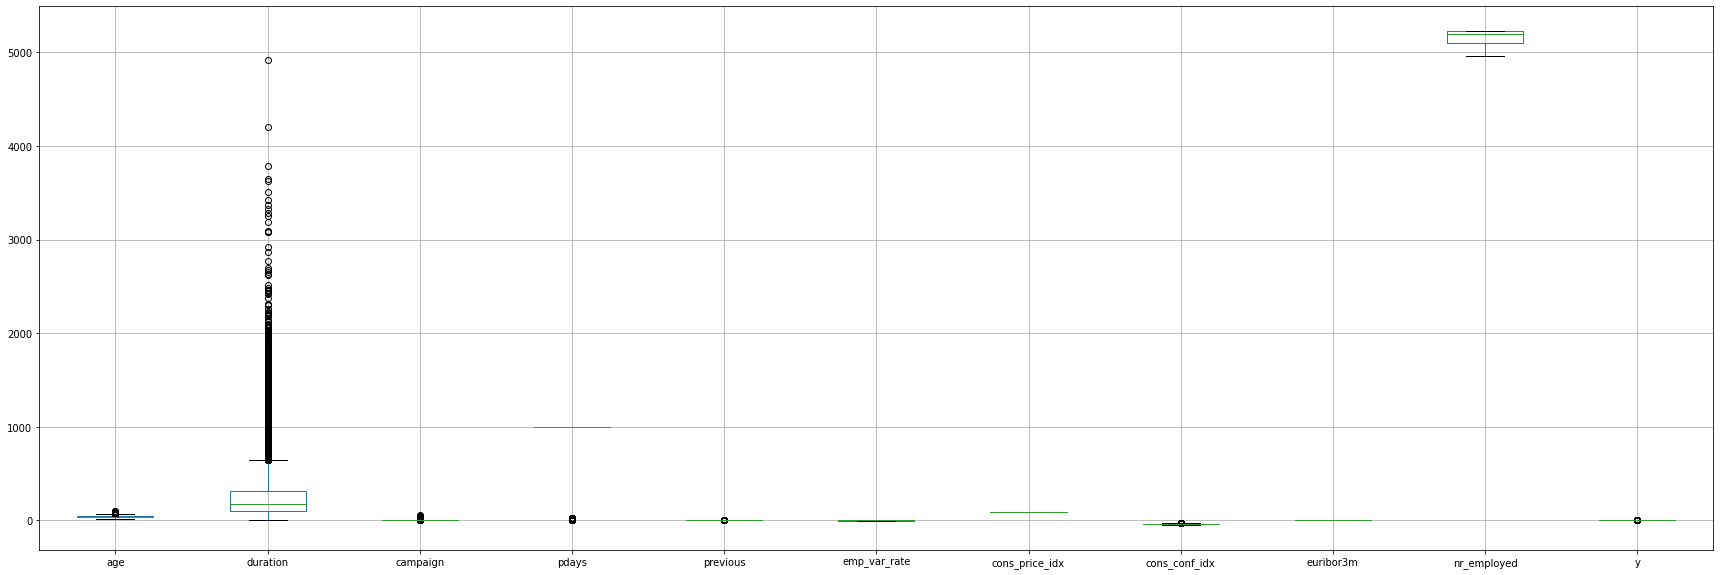

In [16]:
data3.boxplot(figsize = (30, 10))

In [17]:
dataDrop = data3[['contact', 'month', 'day_of_week', 'duration', 'campaign']]
dataDrop.head()

,contact,month,day_of_week,duration,campaign
0,cellular,aug,thu,210,1
1,cellular,nov,fri,138,1
2,cellular,jun,thu,339,3
3,cellular,apr,fri,185,2
4,cellular,aug,fri,137,1


In [19]:
data3Final = data3.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign'], axis=1)
data3Final.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [42]:
cat = data3Final.select_dtypes(exclude=['int', 'float']).columns
CatVar = data3Final[cat]
print('Number of categorical features:', len(cat))

Number of categorical features: 7


In [46]:
for column in CatVar.columns:
    # print(column)
    print(CatVar.groupby(column)[column].agg(['count']))    
    print()

               count
job                 
admin.         10422
blue-collar     9254
entrepreneur    1456
housemaid       1060
management      2924
retired         1720
self-employed   1421
services        3969
student          875
technician      6743
unemployed      1014
unknown          330

          count
marital        
divorced   4612
married   24928
single    11568
unknown      80

                     count
education                 
basic.4y              4176
basic.6y              2292
basic.9y              6045
high.school           9515
illiterate              18
professional.course   5243
university.degree    12168
unknown               1731

         count
default       
no       32588
unknown   8597
yes          3

         count
housing       
no       18622
unknown    990
yes      21576

         count
loan          
no       33950
unknown    990
yes       6248

             count
poutcome          
failure       4252
nonexistent  35563
success       1373



In [47]:
CatVar['education'] = np.where(CatVar['education'] == 'basic.4y', 'basic',
                            np.where(CatVar['education'] == 'basic.6y', 'basic',
                                    np.where(CatVar['education'] == 'basic.9y', 'basic',
                                            np.where(CatVar['education'] == 'illiterate', 'unknown',
                                                    CatVar['education']))))

CatVar['job']=np.where(CatVar['job'] == 'entrepreneur', 'management',
                      np.where(CatVar['job'] == 'self-employed', 'management',
                              np.where(CatVar['job'] == 'retired', 'other 1', 
                                       np.where(CatVar['job'] == 'unknown', 'other 2', 
                                                np.where(CatVar['job'] == 'student', 'other 1', 
                                                         np.where(CatVar['job'] == 'unemployed', 'other 2', 
                                                                  np.where(CatVar['job'] == 'housemaid', 'other 2', 
                                                                           CatVar['job'])))))))


CatVar['marital']=np.where(CatVar['marital'] == 'unknown', 'single',CatVar['marital'])


CatVar['default']=np.where(CatVar['default'] == 'yes','unknown', CatVar['default'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [48]:
for column in CatVar.columns:
    print(CatVar.groupby(column)[column].agg(['count']))

             count
job               
admin.       10422
blue-collar   9254
management    5801
other 1       2595
other 2       2404
services      3969
technician    6743
          count
marital        
divorced   4612
married   24928
single    11648
                     count
education                 
basic                12513
high.school           9515
professional.course   5243
university.degree    12168
unknown               1749
         count
default       
no       32588
unknown   8600
         count
housing       
no       18622
unknown    990
yes      21576
         count
loan          
no       33950
unknown    990
yes       6248
             count
poutcome          
failure       4252
nonexistent  35563
success       1373


In [49]:
Cat_dummies = pd.get_dummies(CatVar, drop_first=True)
print(CatVar.shape)
print(Cat_dummies.shape)

(41188, 7)
(41188, 19)


In [52]:
cont1 = data3Final.select_dtypes(include=['int', 'float']).columns
print('initial number of continuous features: ',len(cont1))


## Exclude those previously classified as dummies
cont4 = set(cont1).difference(cat)
cont = set(cont4).difference(data3Final[['y']])
print('initial number of continuous features after exclusions: ',len(cont))
print()

ContVar= data3Final[cont]

initial number of continuous features:  9
initial number of continuous features after exclusions:  8



In [53]:
from sklearn.preprocessing import StandardScaler

### Standardise variables 
sc=StandardScaler()

sc.fit(ContVar)
ContVar_std=pd.DataFrame(sc.transform(ContVar),columns=cont)

In [54]:
print(data3Final[['y']].shape)
print(ContVar.shape)
print(ContVar_std.shape)
print(Cat_dummies.shape)

(41188, 1)
(41188, 8)
(41188, 8)
(41188, 19)


In [56]:
df = pd.concat([data3Final[['y']], ContVar_std, Cat_dummies], axis=1)
df.shape
df.to_csv('banking-final.csv', index=False) # make sure you drop index when saving to csv
df.head()

,y,pdays,euribor3m,emp_var_rate,cons_conf_idx,age,nr_employed,previous,cons_price_idx,job_blue-collar,...,education_professional.course,education_university.degree,education_unknown,default_unknown,housing_unknown,housing_yes,loan_unknown,loan_yes,poutcome_nonexistent,poutcome_success
0,0,0.195414,0.773575,0.839061,0.951267,0.381527,0.845170,-0.349494,-0.227465,1,...,0,0,0,1,0,1,0,0,1,0
1,0,0.195414,0.230456,-0.115781,-0.323542,1.245157,0.398115,-0.349494,-0.649003,0,...,0,0,1,0,0,0,0,0,1,0
2,1,-5.117342,-1.667578,-1.134279,0.151810,-1.153816,-2.428157,3.691766,0.828107,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0.195414,-1.277824,-1.197935,-1.425496,-0.098268,-0.940281,-0.349494,-0.864955,0,...,0,0,0,0,0,0,0,0,1,0
4,1,-5.133393,-1.586859,-1.898153,1.966794,1.437075,-1.257233,1.671136,-2.374889,0,...,0,0,0,0,0,1,0,0,0,1
